In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial= pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
mouse_drug_clinical = pd.merge(clinical_trial, mouse_drug, on="Mouse ID", how="left")

# Display the data table for preview
mouse_drug_clinical.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_drug = mouse_drug_clinical.groupby(["Drug","Timepoint"], as_index=False)

# Convert to DataFrame
tumor_volume_mean = pd.DataFrame(grouped_drug["Tumor Volume (mm3)"].mean())

# Preview DataFrame
tumor_volume_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem = mouse_drug_clinical.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
tumor_volume_sem = pd.DataFrame(sem).reset_index()

# Preview DataFrame
tumor_volume_sem.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_mean_new = tumor_volume_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_volume_mean_new.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_sem_new = tumor_volume_sem.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_volume_sem_new.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


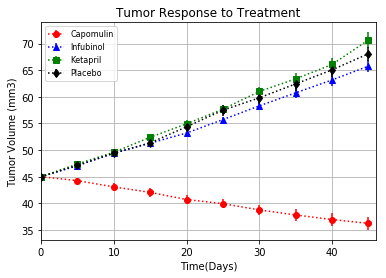

In [6]:
# Generate the Plot (with Error Bars)
plt.title('Tumor Response to Treatment', fontsize = 12)
plt.xlabel('Time(Days)', fontsize = 10)
plt.ylabel('Tumor Volume (mm3)', fontsize = 10)
plt.xlim(0, tumor_volume_mean_new.index.max()+1)

# markers used throughout
markers = ['o', '^', 's', 'd']
colors = ['red', 'blue', 'green', 'black']

# count for markers and colors in plot loop
count = 0

# Set up x_axis value
x_axis = tumor_volume_mean_new.index

# Extract four drugs information to new dataframe
tumor_volume_mean_drugs = tumor_volume_mean_new.loc[:, ['Capomulin','Infubinol','Ketapril','Placebo']]

# plot each drug treatment column with standard error
for column in tumor_volume_mean_drugs.columns:
    plt.errorbar(x_axis, 
                tumor_volume_mean_new[column],
                tumor_volume_sem_new[column],
                linestyle =':',
                marker = markers[count],
                color = colors[count])
    count += 1

# legend option
legend = plt.legend(fontsize = '8')

plt.grid()

# Save the Figure
plt.savefig("../Images/TumorVolume.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
tumor_metastatic_mean = pd.DataFrame(grouped_drug["Metastatic Sites"].mean())

# Preview DataFrame
tumor_metastatic_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_metastatic = mouse_drug_clinical.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame
tumor_metastatic_sem = pd.DataFrame(sem_metastatic).reset_index()

# Preview DataFrame
tumor_metastatic_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
tumor_metastatic_mean_new = tumor_metastatic_mean.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
tumor_metastatic_mean_new.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
# Minor Data Munging to Re-Format the Data Frames
tumor_metastatic_sem_new = tumor_metastatic_sem.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
tumor_metastatic_sem_new.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


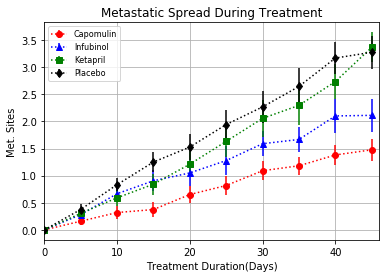

In [11]:
# Generate the Plot (with Error Bars)
plt.title('Metastatic Spread During Treatment', fontsize = 12)
plt.xlabel('Treatment Duration(Days)', fontsize = 10)
plt.ylabel('Met. Sites', fontsize = 10)
plt.xlim(0, tumor_metastatic_mean_new.index.max()+1)

# markers used throughout
markers = ['o', '^', 's', 'd']
colors = ['red', 'blue', 'green', 'black']

# count for markers and colors in plot loop
count = 0

# Set up x_axis value
x_axis = tumor_metastatic_mean_new.index

# Extract four drugs information to new dataframe
tumor_metastatic_mean_drugs = tumor_metastatic_mean_new.loc[:, ['Capomulin','Infubinol','Ketapril','Placebo']]

# plot each drug treatment column with standard error
for column in tumor_metastatic_mean_drugs.columns:
    plt.errorbar(x_axis, 
                tumor_metastatic_mean_new[column],
                tumor_metastatic_sem_new[column],
                linestyle =':',
                marker = markers[count],
                color = colors[count])
    count += 1

# legend option
legend = plt.legend(fontsize = '8')

plt.grid()

# Save the Figure
plt.savefig("../Images/MetSites.png")

# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the mice count Grouped by Drug and Timepoint
mice = mouse_drug_clinical.groupby(['Drug', 'Timepoint']).count()['Mouse ID']

# Convert to DataFrame
mice_count = pd.DataFrame(mice).reset_index()

# Preview DataFrame
mice_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_new = mice_count.pivot(index='Timepoint', columns='Drug', values='Mouse ID')

# Preview the Data Frame
mice_count_new.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


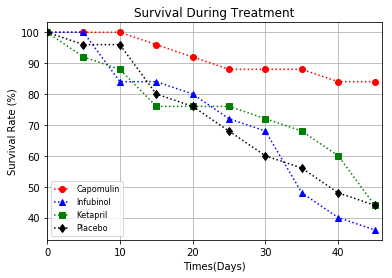

In [14]:
# Generate the Plot (with Error Bars)
plt.title('Survival During Treatment', fontsize = 12)
plt.xlabel('Times(Days)', fontsize = 10)
plt.ylabel('Survival Rate (%)', fontsize = 10)
plt.xlim(0, mice_count_new.index.max()+1)

# markers used throughout
markers = ['o', '^', 's', 'd']
colors = ['red', 'blue', 'green', 'black']

# count for markers and colors in plot loop
count = 0

# Set up x_axis value
x_axis = mice_count_new.index

# Extract four drugs information to new dataframe
mice_count_new_drugs = mice_count_new.loc[:, ['Capomulin','Infubinol','Ketapril','Placebo']]

# plot each drug treatment column with standard error
for x in mice_count_new_drugs.columns:
    y_axis = mice_count_new_drugs[x]/mice_count_new_drugs.loc[0,x] * 100
    plt.plot(x_axis, 
             y_axis,
             linestyle =':',
            marker = markers[count],
                color = colors[count])
    count += 1

# legend option
legend = plt.legend(fontsize = '8')

plt.grid()

# Save the Figure
plt.savefig("../Images/SurvivalRate.png")

# Show the Figure
plt.show()


## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
percent_change = (tumor_volume_mean_new.loc[45, :] - tumor_volume_mean_new.loc[0, :])\
                 /tumor_volume_mean_new.loc[0, :] * 100

# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

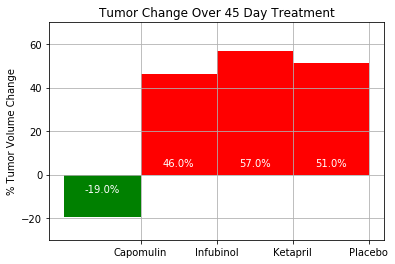

In [16]:
# Store four drug Relevant Percent Changes into a list
relevant_percent = [percent_change['Capomulin'], percent_change['Infubinol'],\
                    percent_change['Ketapril'], percent_change['Placebo']]

# Orient widths. Add labels, tick marks, etc. 
plt.title('Tumor Change Over 45 Day Treatment', fontsize = 12)
plt.ylabel('% Tumor Volume Change')
xlabels = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'] 
plt.xticks(np.arange(len(xlabels))+0.5, xlabels)
plt.ylim(-30, 70, 20)
plt.bar(np.arange(len(xlabels)), 
        relevant_percent, 
        width = 1,
        # colors each bar appropriately based on + or - values by using a conditional list
        color = ['red' if relevant_percent[p] > 0 else 'green' for p in np.arange(len(xlabels))]
       )
plt.grid()

# Use functions to label the percentages of changes
def label(x, percent):
    if percent < 0:
        y_coor = -8
    else:
        y_coor = 4
    plt.text(x, y_coor, str(round(percent, 0)) + '%', ha = 'center', color = 'white')

# Call functions to implement the function calls
for i in np.arange(len(relevant_percent)):
    label(i, relevant_percent[i])
    
# Save the Figure
plt.savefig("../Images/TumorChange.png")

# Show the Figure
plt.show()




Three observable trends based on the data:

1. Capomulin is the most effective drug and inhibit tumor growth by decreasing 19.0% of tumor volume through 45 days. The other three drugs don't effectively inhibit tumor growth and have similar tumor volume change by increasing about 50%.

2. Capomulin also can inhibit tumor metastasis by average met.sites of 1.5 at day 45. Infubinol is the second effective drug to inhibit tumor metastasis by average met.sites of 2. Drug Ketapril and Placebo have similar metastasis inhibition by day 45 with the average met.sites of 3.5, althrough Ketapril has lower met.sites than Placebo within 40 days.

3. Capomulin treated mice have the best survival rate, about 85% of mice still survival at day 45. However, more than half of the other three drugs treated mice were dead at day 45. The survival rate of Ketapril and Placebo is 45% and Infubinol is 35%. 